Todos os imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

## Os próximos passos são para o tratamento das features que serão usadas e separação dos dados em treinamento e teste

In [57]:
# Define o caminho para o arquivo CSV
file_path = 'dados.csv'

# Lê o arquivo CSV ignorando as linhas de comentários
df = pd.read_csv(file_path, comment='#')

# Exibe as primeiras linhas do DataFrame para verificação
print(df.head())
df.shape

   rowid     kepid kepoi_name    kepler_name koi_disposition koi_vet_stat  \
0      1  11446443  K00001.01     Kepler-1 b       CONFIRMED         Done   
1      2  10666592  K00002.01     Kepler-2 b       CONFIRMED         Done   
2      3  10748390  K00003.01     Kepler-3 b       CONFIRMED         Done   
3      4   3861595  K00004.01  Kepler-1658 b       CONFIRMED         Done   
4      5   8554498  K00005.01            NaN       CANDIDATE         Done   

  koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  ...  \
0   2015-09-24        CANDIDATE        NaN              0  ...   
1   2015-09-24        CANDIDATE        NaN              0  ...   
2   2015-09-24        CANDIDATE        NaN              0  ...   
3   2015-09-24        CANDIDATE        NaN              0  ...   
4   2015-09-24        CANDIDATE        NaN              0  ...   

   koi_dicco_mdec  koi_dicco_mdec_err  koi_dicco_msky koi_dicco_msky_err  \
0          -0.300               0.160           0.300           

(7470, 141)

In [58]:
# Aplicar condição para utilizar apenas os koi (Kepler Objects of Interest) que já foram analisados como sendo ou não um exoplaneta,
# para isso ignorar candidatos.
df_filtrado = df[df['koi_disposition'] != 'CANDIDATE']

# Verificar a forma do DataFrame após filtragem
print("Após filtragem:", df_filtrado.shape)

# Manter apenas as colunas numéricas, usar apenas features numericas
df_numerico = df_filtrado.select_dtypes(include=['number'])

# Verificar a forma do DataFrame após remover colunas não numéricas
print("Shape com numéricos:", df_numerico.shape)

print(df_numerico.head())

Após filtragem: (5873, 141)
Shape com numéricos: (5873, 124)
   rowid     kepid  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0      1  11446443        NaN              0              0              0   
1      2  10666592        NaN              0              1              0   
2      3  10748390        NaN              0              0              0   
3      4   3861595        NaN              0              1              0   
5      6   3248033        NaN              0              0              1   

   koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  ...  \
0              0    2.470613     1.900000e-08    -1.900000e-08  ...   
1              0    2.204735     3.800000e-08    -3.800000e-08  ...   
2              0    4.887803     1.770000e-07    -1.770000e-07  ...   
3              0    3.849372     1.304000e-06    -1.304000e-06  ...   
5              1    1.334104     7.070000e-07    -7.070000e-07  ...   

   koi_dicco_mdec  koi_dicco_mdec_err  koi_

In [59]:
# Verificar se existem colunas inteiras com dados nulos (NaN)
colunas_completamente_nulas = df_numerico.columns[df_numerico.isnull().all()]

# Exibir as colunas que têm todos os valores como NaN
print("Colunas inteiras com dados nulos (NaN):")
print(colunas_completamente_nulas)

Colunas inteiras com dados nulos (NaN):
Index(['koi_score', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp',
       'koi_longp_err1', 'koi_longp_err2', 'koi_ingress', 'koi_ingress_err1',
       'koi_ingress_err2', 'koi_sma_err1', 'koi_sma_err2', 'koi_incl_err1',
       'koi_incl_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_bin_oedp_sig',
       'koi_model_dof', 'koi_model_chisq', 'koi_sage', 'koi_sage_err1',
       'koi_sage_err2'],
      dtype='object')


In [60]:
# Remover colunas nulas do DataFrame
df_numerico = df_numerico.drop(columns=colunas_completamente_nulas)

# Verificar a forma do DataFrame após remover as colunas nulas
print("Shape após remover colunas nulas:", df_numerico.shape)

# Exibir as primeiras linhas do DataFrame resultante
print(df_numerico.head())

Shape após remover colunas nulas: (5873, 103)
   rowid     kepid  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0      1  11446443              0              0              0   
1      2  10666592              0              1              0   
2      3  10748390              0              0              0   
3      4   3861595              0              1              0   
5      6   3248033              0              0              1   

   koi_fpflag_ec  koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0              0    2.470613     1.900000e-08    -1.900000e-08   122.763301   
1              0    2.204735     3.800000e-08    -3.800000e-08   121.358572   
2              0    4.887803     1.770000e-07    -1.770000e-07   124.813141   
3              0    3.849372     1.304000e-06    -1.304000e-06   157.526738   
5              1    1.334104     7.070000e-07    -7.070000e-07   133.701635   

   ...  koi_dicco_mdec  koi_dicco_mdec_err  koi_dicco_msky  \
0  ...        

In [61]:
# Criar um dicionário de mapeamento
mapeamento_disposicoes = {'FALSE POSITIVE': 0, 'CONFIRMED': 1}

# Aplicar o mapeamento à coluna koi_disposition
df_numerico['target'] = df_filtrado['koi_disposition'].map(mapeamento_disposicoes)

# Exibir o "target"
print(df_numerico.target)

0       1
1       1
2       1
3       1
5       0
       ..
7464    0
7465    0
7467    0
7468    0
7469    0
Name: target, Length: 5873, dtype: int64


In [62]:
# Verificando se há dados faltantes
dados_faltantes = df_numerico.isnull().sum()
print("Dados faltantes no dataset:")
print(dados_faltantes)

Dados faltantes no dataset:
rowid                   0
kepid                   0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
                     ... 
koi_dikco_mdec        378
koi_dikco_mdec_err    378
koi_dikco_msky        378
koi_dikco_msky_err    378
target                  0
Length: 104, dtype: int64


O dataframe ficou com 4976 objetos contendo 104 features

In [63]:
# Remover as linhas com qualquer dado faltante
df_full_features = df_numerico.dropna()
df_full_features.shape

(4976, 104)

In [112]:
counts = df_full_features['target'].value_counts()
print(counts)

target
1    2569
0    2407
Name: count, dtype: int64


In [104]:
feature_names = df_full_features.columns.tolist()

# Imprimindo os nomes das features
for feature in feature_names:
    print(feature)

rowid
kepid
koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_period
koi_period_err1
koi_period_err2
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_time0
koi_time0_err1
koi_time0_err2
koi_eccen
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_ror
koi_ror_err1
koi_ror_err2
koi_srho
koi_srho_err1
koi_srho_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_sma
koi_incl
koi_teq
koi_insol
koi_insol_err1
koi_insol_err2
koi_dor
koi_dor_err1
koi_dor_err2
koi_ldm_coeff4
koi_ldm_coeff3
koi_ldm_coeff2
koi_ldm_coeff1
koi_max_sngle_ev
koi_max_mult_ev
koi_model_snr
koi_count
koi_num_transits
koi_tce_plnt_num
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_smet
koi_smet_err1
koi_smet_err2
koi_srad
koi_srad_err1
koi_srad_err2
koi_smass
koi_smass_err1
koi_smass_err2
ra
dec
koi_kepmag
koi_gmag
koi_rmag
koi_imag
koi_zmag
koi_jmag
koi_hmag
koi_kmag
koi_fwm_stat_sig
koi_fwm_sra

In [64]:
# Separar features (X) e variável alvo (y)
X = df_full_features.drop(columns=['target'])
y = df_full_features['target']

# Salvar os nomes das features
features = X.columns.tolist()

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificando se os tamanhos são consistentes
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (3980, 103)
Tamanho de X_test: (996, 103)
Tamanho de y_train: (3980,)
Tamanho de y_test: (996,)


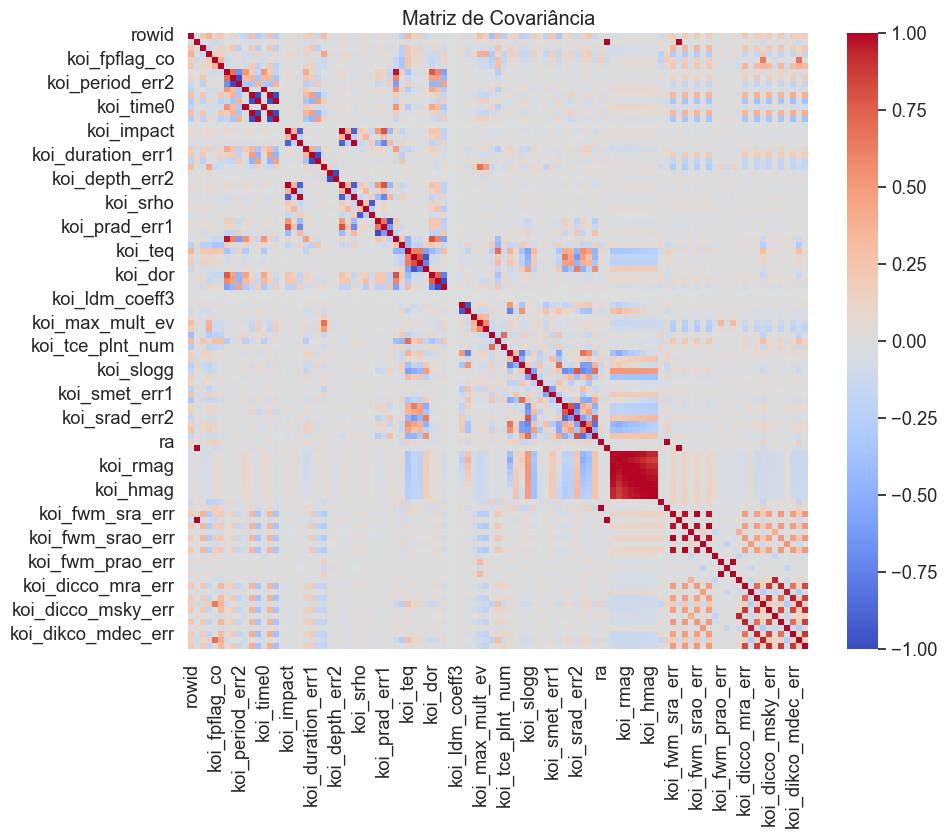

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Cálculo da matriz de covariância com os dados normalizados
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# Converter para DataFrame para melhor visualização
cov_df = pd.DataFrame(cov_matrix, index=X_train.columns, columns=X_train.columns)

# Plotando o heatmap da matriz de covariância
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cov_df, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Matriz de Covariância')
plt.show()

## Regressão Logística

In [65]:
# Treinar o modelo com os dados de treino
model = LogisticRegression(max_iter=100000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino = model.predict(X_train)
predicoes_teste = model.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino = balanced_accuracy_score(y_train, predicoes_treino)
acuracia_teste = balanced_accuracy_score(y_test, predicoes_teste)

# Imprimindo as acurácias
print()
print("Acurácia treino:    {:.2f}%".format(acuracia_treino * 100))
print("Acurácia teste:     {:.2f}%".format(acuracia_teste * 100))


Acurácia treino:    88.64%
Acurácia teste:     88.87%


c:\Projetos_VSC\Python\Trabalhos\Final\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Não estava convergindo mesmo aumentando bastante o número de iterações, então vou utilizar o escalonamento dos dados e o uso de um solver diferente.


In [66]:
# Criar a pipeline com o StandardScaler e o modelo de regressão logística com solver 'saga'
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga', max_iter=10000, random_state=42))
])

# Treinar o modelo com os dados de treino
pipeline.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino = pipeline.predict(X_train)
predicoes_teste = pipeline.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino = balanced_accuracy_score(y_train, predicoes_treino)
acuracia_teste = balanced_accuracy_score(y_test, predicoes_teste)

# Imprimindo as acurácias
print()
print("Acurácia treino:    {:.2f}%".format(acuracia_treino * 100))
print("Acurácia teste:     {:.2f}%".format(acuracia_teste * 100))


Acurácia treino:    99.68%
Acurácia teste:     99.02%


Optimizando regressão logistica

In [67]:
# Definindo os parâmetros para GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 2, 3, 4, 5],
    'classifier__solver': ['saga', 'lbfgs']
}

# Criando a pipeline com StandardScaler e LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga', max_iter=10000, random_state=42))
])

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy')

# Treinando o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados pelo GridSearchCV
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

# Fazendo previsões com o melhor modelo encontrado
predicoes_treino = grid_search.predict(X_train)
predicoes_teste = grid_search.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino = balanced_accuracy_score(y_train, predicoes_treino)
acuracia_teste = balanced_accuracy_score(y_test, predicoes_teste)

# Imprimindo as acurácias
print()
print("Acurácia treino:    {:.2f}%".format(acuracia_treino * 100))
print("Acurácia teste:     {:.2f}%".format(acuracia_teste * 100))

Melhores parâmetros encontrados: {'classifier__C': 3, 'classifier__solver': 'saga'}

Acurácia treino:    99.68%
Acurácia teste:     99.12%


Matriz confusão Regressão Logística

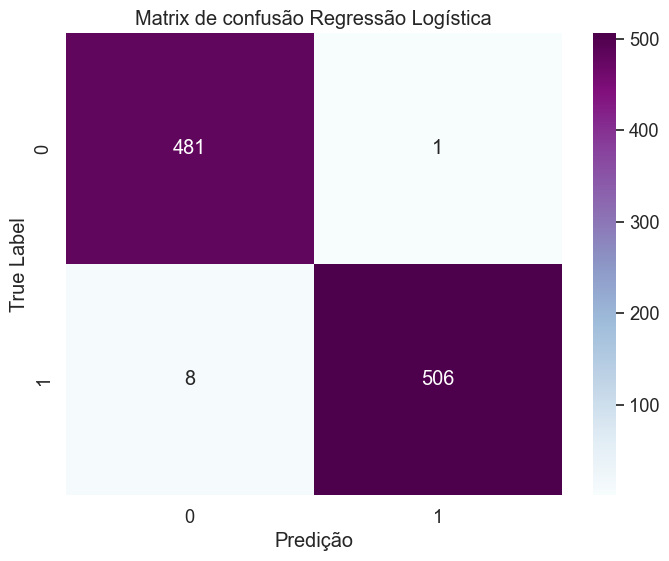

In [68]:
# Calculando a matriz de confusão de regressão logistica
matriz_confusao = confusion_matrix(y_test, predicoes_teste)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matrix de confusão Regressão Logística')
plt.xlabel('Predição')
plt.ylabel('True Label')
plt.show()

## SVM

In [69]:
# Criar a pipeline com o StandardScaler e o modelo SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

# Treinar o modelo com os dados de treino
pipeline_svm.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino_svm = pipeline_svm.predict(X_train)
predicoes_teste_svm = pipeline_svm.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_svm = balanced_accuracy_score(y_train, predicoes_treino_svm)
acuracia_teste_svm = balanced_accuracy_score(y_test, predicoes_teste_svm)

# Imprimindo as acurácias
print()
print("Acurácia treino (SVM):    {:.2f}%".format(acuracia_treino_svm * 100))
print("Acurácia teste (SVM):     {:.2f}%".format(acuracia_teste_svm * 100))


Acurácia treino (SVM):    99.51%
Acurácia teste (SVM):     98.63%


Optimizando SVM

In [70]:
# Definindo os parâmetros para GridSearchCV
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100, 200],  # Valores para o parâmetro C
    'classifier__gamma': ['scale', 'auto', 10, 1, 0.1, 0.01, 0.001, 0.0001]  # Valores para o parâmetro gamma
}

# Criando a pipeline com StandardScaler e SVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

# Criando o objeto GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='balanced_accuracy')

# Treinando o modelo usando GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados pelo GridSearchCV
best_params_svm = grid_search_svm.best_params_
print("Melhores parâmetros encontrados:", best_params_svm)

# Fazendo previsões com o melhor modelo encontrado
predicoes_treino_svm = grid_search_svm.predict(X_train)
predicoes_teste_svm = grid_search_svm.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_svm = balanced_accuracy_score(y_train, predicoes_treino_svm)
acuracia_teste_svm = balanced_accuracy_score(y_test, predicoes_teste_svm)

# Imprimindo as acurácias
print()
print("Acurácia treino (SVM):    {:.2f}%".format(acuracia_treino_svm * 100))
print("Acurácia teste (SVM):     {:.2f}%".format(acuracia_teste_svm * 100))

Melhores parâmetros encontrados: {'classifier__C': 100, 'classifier__gamma': 0.001}

Acurácia treino (SVM):    99.78%
Acurácia teste (SVM):     98.92%


Matriz confusão SVM

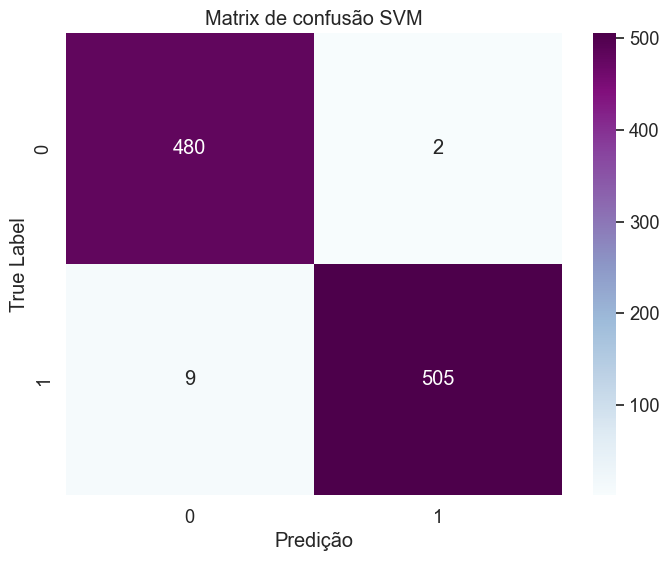

In [71]:
# Calculando a matriz de confusão de svm
matriz_confusao_svm = confusion_matrix(y_test, predicoes_teste_svm)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao_svm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matrix de confusão SVM')
plt.xlabel('Predição')
plt.ylabel('True Label')
plt.show()

## K-NN

In [72]:
# Criar a pipeline com o StandardScaler e o modelo k-NN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Treinar o modelo com os dados de treino
pipeline_knn.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino_knn = pipeline_knn.predict(X_train)
predicoes_teste_knn = pipeline_knn.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_knn = balanced_accuracy_score(y_train, predicoes_treino_knn)
acuracia_teste_knn = balanced_accuracy_score(y_test, predicoes_teste_knn)

# Imprimindo as acurácias
print()
print("Acurácia treino (k-NN):    {:.2f}%".format(acuracia_treino_knn * 100))
print("Acurácia teste (k-NN):     {:.2f}%".format(acuracia_teste_knn * 100))


Acurácia treino (k-NN):    96.10%
Acurácia teste (k-NN):     95.88%


Optimizando KNN

In [73]:
# Definindo os parâmetros para GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2]
}

# Criando a pipeline com StandardScaler e KNeighborsClassifier
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Criando o objeto GridSearchCV
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='balanced_accuracy')

# Treinando o modelo usando GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados pelo GridSearchCV
best_params_knn = grid_search_knn.best_params_
print("Melhores parâmetros encontrados:", best_params_knn)

# Fazendo previsões com o melhor modelo encontrado
predicoes_treino_knn = grid_search_knn.predict(X_train)
predicoes_teste_knn = grid_search_knn.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_knn = balanced_accuracy_score(y_train, predicoes_treino_knn)
acuracia_teste_knn = balanced_accuracy_score(y_test, predicoes_teste_knn)

# Imprimindo as acurácias
print()
print("Acurácia treino (k-NN):    {:.2f}%".format(acuracia_treino_knn * 100))
print("Acurácia teste (k-NN):     {:.2f}%".format(acuracia_teste_knn * 100))

Melhores parâmetros encontrados: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__p': 2, 'classifier__weights': 'distance'}

Acurácia treino (k-NN):    100.00%
Acurácia teste (k-NN):     95.99%


Matriz confusão K-NN

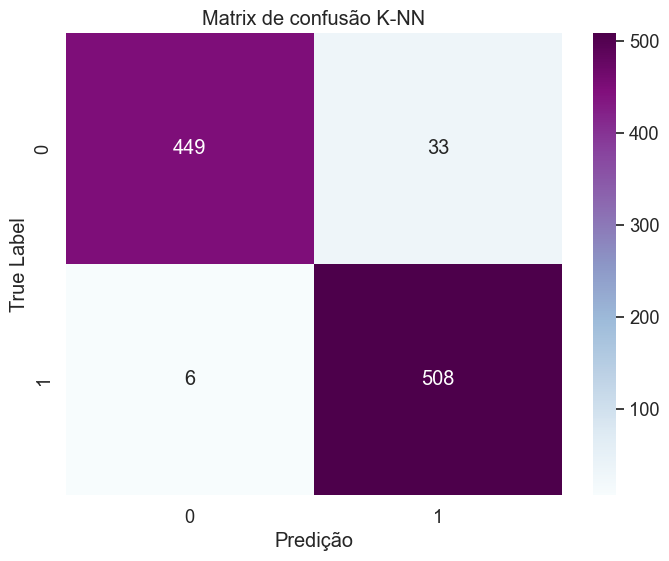

In [74]:
# Calculando a matriz de confusão de knn
matriz_confusao_knn = confusion_matrix(y_test, predicoes_teste_knn)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao_knn, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matrix de confusão K-NN')
plt.xlabel('Predição')
plt.ylabel('True Label')
plt.show()

## Random Forest

In [75]:
# Criar a pipeline com o StandardScaler e o modelo Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treinar o modelo com os dados de treino
pipeline_rf.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino_rf = pipeline_rf.predict(X_train)
predicoes_teste_rf = pipeline_rf.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_rf = balanced_accuracy_score(y_train, predicoes_treino_rf)
acuracia_teste_rf = balanced_accuracy_score(y_test, predicoes_teste_rf)

# Imprimindo as acurácias
print()
print("Acurácia treino (Random Forest):    {:.2f}%".format(acuracia_treino_rf * 100))
print("Acurácia teste (Random Forest):     {:.2f}%".format(acuracia_teste_rf * 100))


Acurácia treino (Random Forest):    100.00%
Acurácia teste (Random Forest):     98.73%


Optimizando Random Forest

In [77]:
# Definindo uma grade de hiperparâmetros para a otimização da Floresta Aleatória
param_grid_rf = {
    'classifier__n_estimators': [200, 300, 400],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Criando uma nova instância do GridSearchCV para a otimização da Floresta Aleatória
grid_search_random_forest = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=1)

# Ajustando a pipeline aos dados de treinamento
grid_search_random_forest.fit(X_train, y_train)
print(grid_search_random_forest.best_params_)
print()

# Fazendo previsões nos dados de treinamento e de validação
predicoes_treino_rf = grid_search_random_forest.predict(X_train)
predicoes_validacao_rf = grid_search_random_forest.predict(X_test)

# Calculando a acurácia nos dados de treinamento e de validação
acuracia_treino_rf = balanced_accuracy_score(y_train, predicoes_treino_rf)
acuracia_validacao_rf = balanced_accuracy_score(y_test, predicoes_validacao_rf)

# Imprimindo as acurácias
print()
print("Acurácia treino (Random Forest):    {:.2f}%".format(acuracia_treino_rf * 100))
print("Acurácia teste (Random Forest):     {:.2f}%".format(acuracia_validacao_rf * 100))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}


Acurácia treino (Random Forest):    99.95%
Acurácia teste (Random Forest):     98.63%


Tentei otimizar acima, mas o desempenho piorou um pouco. Testando mais parâmetros para optimizar agora usando RandomizedSearchCV.

In [78]:
# Parâmetros para RandomizedSearchCV
param_dist_rf = {
    'classifier__n_estimators': randint(200, 400),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Criando uma nova instância do RandomizedSearchCV para a otimização da Floresta Aleatória
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=100, cv=10, verbose=1, n_jobs=-1, random_state=42)

# Ajustando a pipeline aos dados de treinamento
random_search_rf.fit(X_train, y_train)
print(random_search_rf.best_params_)
print()

# Fazendo previsões nos dados de treinamento e de validação
predicoes_treino_rf = random_search_rf.predict(X_train)
predicoes_validacao_rf = random_search_rf.predict(X_test)

# Calculando a acurácia nos dados de treinamento e de validação
acuracia_treino_rf = balanced_accuracy_score(y_train, predicoes_treino_rf)
acuracia_validacao_rf = balanced_accuracy_score(y_test, predicoes_validacao_rf)

# Imprimindo as acurácias
print()
print("Acurácia treino (Random Forest):    {:.2f}%".format(acuracia_treino_rf * 100))
print("Acurácia teste (Random Forest):     {:.2f}%".format(acuracia_validacao_rf * 100))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 13, 'classifier__n_estimators': 361}


Acurácia treino (Random Forest):    99.95%
Acurácia teste (Random Forest):     98.83%


Matriz confusão Random Forest

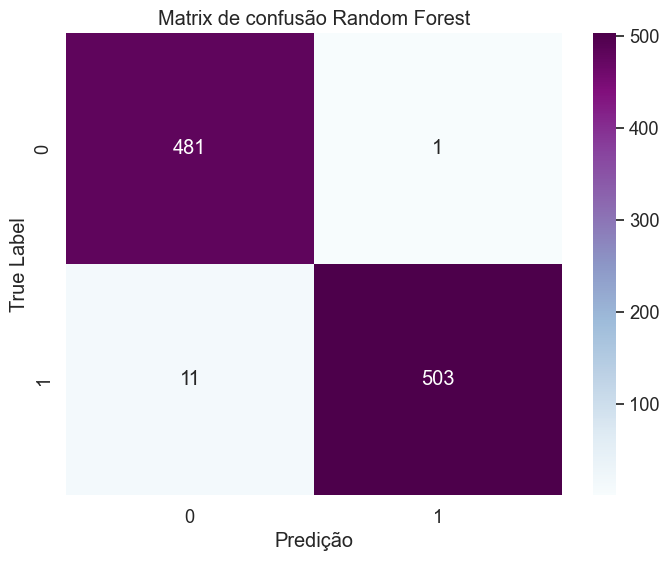

In [91]:
# Calculando a matriz de confusão de regressão logistica
matriz_confusao_rf = confusion_matrix(y_test, predicoes_validacao_rf)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao_rf, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matrix de confusão Random Forest')
plt.xlabel('Predição')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting

In [80]:
# Criar a pipeline com o StandardScaler e o modelo Random Forest
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
])

# Treinar o modelo com os dados de treino
pipeline_gb.fit(X_train, y_train)

# Fazer previsões nos dados de treinamento e de teste
predicoes_treino_gb = pipeline_rf.predict(X_train)
predicoes_teste_gb = pipeline_rf.predict(X_test)

# Calculando a acurácia balanceada nos dados de treinamento e de teste
acuracia_treino_gb = balanced_accuracy_score(y_train, predicoes_treino_gb)
acuracia_teste_gb = balanced_accuracy_score(y_test, predicoes_teste_gb)

# Imprimindo as acurácias
print()
print("Acurácia treino (Gradient Bosting):    {:.2f}%".format(acuracia_treino_gb * 100))
print("Acurácia teste (Gradient Bosting):     {:.2f}%".format(acuracia_teste_gb * 100))


Acurácia treino (Gradient Bosting):    100.00%
Acurácia teste (Gradient Bosting):     98.73%


In [94]:
# Criar a pipeline com o StandardScaler e o modelo Gradient Boosting
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Parâmetros para RandomizedSearchCV
param_dist_gb = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Criando uma nova instância do RandomizedSearchCV para a otimização do Gradient Boosting
random_search_gb = RandomizedSearchCV(pipeline_gb, param_distributions=param_dist_gb, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Ajustando a pipeline aos dados de treinamento
random_search_gb.fit(X_train, y_train)
print(random_search_gb.best_params_)
print()

# Fazendo previsões nos dados de treinamento e de validação
predicoes_treino_gb = random_search_gb.predict(X_train)
predicoes_validacao_gb = random_search_gb.predict(X_test)

# Calculando a acurácia nos dados de treinamento e de validação
acuracia_treino_gb = balanced_accuracy_score(y_train, predicoes_treino_gb)
acuracia_validacao_gb = balanced_accuracy_score(y_test, predicoes_validacao_gb)

# Imprimindo as acurácias
print()
print("Acurácia treino (Gradient Boosting):    {:.2f}%".format(acuracia_treino_gb * 100))
print("Acurácia teste (Gradient Boosting):     {:.2f}%".format(acuracia_validacao_gb * 100))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'classifier__learning_rate': 0.21151020532175702, 'classifier__max_depth': 4, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 167, 'classifier__subsample': 0.9494114470187502}


Acurácia treino (Gradient Boosting):    100.00%
Acurácia teste (Gradient Boosting):     99.22%


Matriz confusão Gradient Bosting

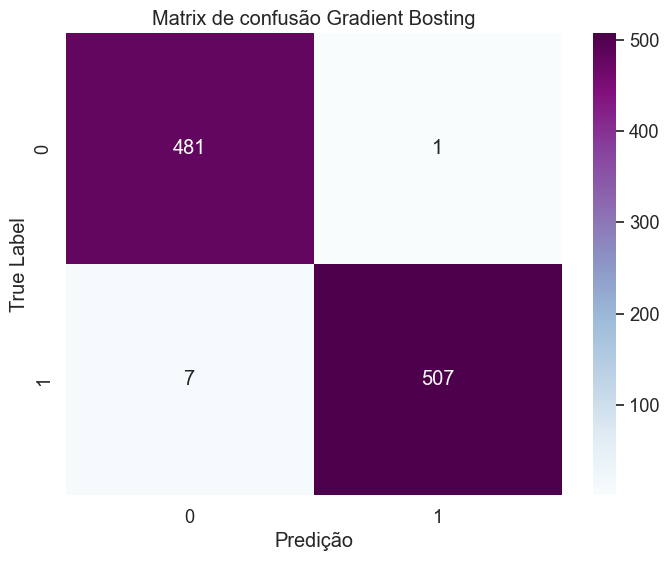

In [90]:
# Calculando a matriz de confusão de regressão logistica
matriz_confusao_gb = confusion_matrix(y_test, predicoes_validacao_gb)

# Plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao_gb, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matrix de confusão Gradient Bosting')
plt.xlabel('Predição')
plt.ylabel('True Label')
plt.show()

Considerando Falsos positivos (FP) e falsos negativos (FN), ranking dos melhores (em caso de empate de FP, FN é considerado):

Gradient Bosting ---- FP 1  -  FN 7

Regressão Logística - FP 1  -  FN 8

Random Forest ------- FP 1  -  FN 11

SVM ----------------- FP 2  -  FN 9

KNN ----------------- FP 33 -  FN 6

Algo interessante a ser apontado é que a menor taxa de falsos negativos ficou para K-NN que obteve pior desempenho em falsos postivos...


Acurácias de validação encontradas, da melhor para a pior:

Gradient Bosting ---- 99,22%

Regressão Logística - 99,12%

SVM ----------------- 98,92%

Random Forest ------- 98,83%

KNN ----------------- 95,99%

## Avaliação de desempenho do modelo Gradient Boosting, testando com 50 iterações:

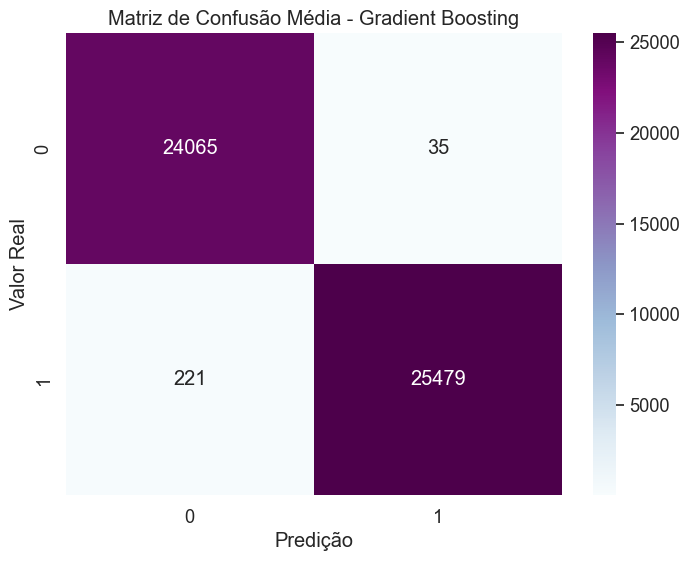

Média da acurácia nos dados de teste:         99.50%
Desvio padrão da acurácia nos dados de teste: 0.18%


In [113]:
# Função para ajustar o modelo e retornar a acurácia
def train_evaluate_model(X, y):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    # Criar a pipeline com o StandardScaler e o modelo Gradient Boosting com os melhores hiperparâmetros encontrados
    pipeline_gb = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(n_estimators=167, learning_rate=0.2115, max_depth=4, min_samples_split=8,
                                                 min_samples_leaf=8, subsample=0.9494, max_features=None, random_state=42))
    ])
    
    # Ajustando a pipeline aos dados de treinamento
    pipeline_gb.fit(X_train, y_train)
    
    # Fazendo previsões nos dados de treinamento e de validação
    predicoes_treino_gb = pipeline_gb.predict(X_train)
    predicoes_validacao_gb = pipeline_gb.predict(X_test)
    
    # Calculando a acurácia nos dados de treinamento e de validação
    acuracia_treino_gb = balanced_accuracy_score(y_train, predicoes_treino_gb)
    acuracia_validacao_gb = balanced_accuracy_score(y_test, predicoes_validacao_gb)
    
    return acuracia_treino_gb, acuracia_validacao_gb, predicoes_validacao_gb, y_test

# Lista para armazenar as acurácias
acuracias_teste = []
all_predicoes_validacao_gb = []
all_y_test = []

# Repetir o processo 50 vezes
for _ in range(50):
    acuracia_treino, acuracia_teste, predicoes_validacao_gb, y_test = train_evaluate_model(X, y)
    acuracias_teste.append(acuracia_teste)
    all_predicoes_validacao_gb.append(predicoes_validacao_gb)
    all_y_test.append(y_test)

# Calculando média e desvio padrão das acurácias de teste
media_acuracia_teste = np.mean(acuracias_teste)
desvio_padrao_acuracia_teste = np.std(acuracias_teste)

# Calculando a matriz de confusão média
all_predicoes_validacao_gb = np.concatenate(all_predicoes_validacao_gb)
all_y_test = np.concatenate(all_y_test)
matriz_confusao_gb_media = confusion_matrix(all_y_test, all_predicoes_validacao_gb)

# Plot da matriz de confusão média
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(matriz_confusao_gb_media, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Matriz de Confusão Média - Gradient Boosting')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()

# Imprimindo resultados
print("Média da acurácia nos dados de teste:         {:.2f}%".format(media_acuracia_teste * 100))
print("Desvio padrão da acurácia nos dados de teste: {:.2f}%".format(desvio_padrao_acuracia_teste * 100))